In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/PRML_bonus_project/Dataset.xlsx')

In [ ]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [ ]:
# sns.heatmap(df.corr())

no use of year of the journey, only month and day matters, so extracting them
<br>
and dropping the original date of journey column

In [ ]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month
df.drop('Date_of_Journey', axis=1, inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-04-29 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-29 05:50:00,2022-04-29 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-29 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-04-29 18:05:00,2022-04-29 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-04-29 16:50:00,2022-04-29 21:35:00,4h 45m,1 stop,No info,13302,3,1


from the arrival and departure time columns, extracting the hour and minutes
<br>
from it and store them in new columns and drop the original ones

In [ ]:
df['Dep_Time_hour']=df['Dep_Time'].dt.hour
df['Dep_Time_min']=df['Dep_Time'].dt.minute
df.drop('Dep_Time',axis=1,inplace=True)

In [ ]:
df['Arrival_Time'+'_hour']=df['Arrival_Time'].dt.hour
df['Arrival_Time'+'_min']=df['Arrival_Time'].dt.minute
df.drop('Arrival_Time',axis=1,inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


next separating the hour and minutes from duration column, for better processing
<br>
for this first uniformly updating it by adding the 'h' and 'm' wherever
<br>
they are missing

In [ ]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]
             
df['Duration']=duration

In [ ]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]
df['dur_hour']=df['Duration'].apply(hour)
df['dur_min']=df['Duration'].apply(minutes)
df.drop('Duration',axis=1,inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [ ]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [ ]:
np.unique(df['Additional_Info'],return_counts=True)

(array(['1 Long layover', '1 Short layover', '2 Long layover',
        'Business class', 'Change airports', 'In-flight meal not included',
        'No Info', 'No check-in baggage included', 'No info',
        'Red-eye flight'], dtype=object),
 array([  19,    1,    1,    4,    7, 1982,    3,  320, 8344,    1]))

categorical features are Airline, source, Destination, Route, Total_Stops, Additional_Info
<br>
out of this 

dropping additional info, since it isn't of much relevance and 8344 values contains No info 

In [ ]:
df.drop('Additional_Info',axis=1,inplace=True)

In [ ]:
np.unique(df['Route'],return_counts=True)

(array(['BLR → AMD → DEL', 'BLR → BBI → DEL', 'BLR → BDQ → DEL',
        'BLR → BOM → AMD → DEL', 'BLR → BOM → BHO → DEL',
        'BLR → BOM → DEL', 'BLR → BOM → IDR → DEL',
        'BLR → BOM → IDR → GWL → DEL', 'BLR → BOM → IXC → DEL',
        'BLR → BOM → JDH → DEL', 'BLR → BOM → NAG → DEL',
        'BLR → BOM → UDR → DEL', 'BLR → CCU → BBI → DEL',
        'BLR → CCU → BBI → HYD → DEL', 'BLR → CCU → BBI → HYD → VGA → DEL',
        'BLR → CCU → DEL', 'BLR → CCU → GAU → DEL', 'BLR → COK → DEL',
        'BLR → DEL', 'BLR → GAU → DEL', 'BLR → GOI → DEL',
        'BLR → HBX → BOM → AMD → DEL', 'BLR → HBX → BOM → BHO → DEL',
        'BLR → HBX → BOM → NAG → DEL', 'BLR → HYD → DEL',
        'BLR → HYD → VGA → DEL', 'BLR → IDR → DEL', 'BLR → LKO → DEL',
        'BLR → MAA → DEL', 'BLR → NAG → DEL', 'BLR → PNQ → DEL',
        'BLR → STV → DEL', 'BLR → TRV → COK → DEL', 'BLR → VGA → DEL',
        'BLR → VGA → HYD → DEL', 'BLR → VGA → VTZ → DEL',
        'BOM → AMD → ISK → HYD', 'BOM → BBI → 

In [ ]:
df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

max there are 5 stops, Eg: DEL → RPR → NAG → BOM → COK
<br>
so breaking each stop destination into a diff column
<br>
and dropping the original route column, we are doing this since 
<br> 
eccoding route column doesn't make sense

In [ ]:
df['stop1']=df['Route'].str.split('→').str[0]
df['stop2']=df['Route'].str.split('→').str[1]
df['stop3']=df['Route'].str.split('→').str[2]
df['stop4']=df['Route'].str.split('→').str[3]
df['stop5']=df['Route'].str.split('→').str[4]

In [ ]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min,stop1,stop2,stop3,stop4,stop5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,22,20,1,10,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,5,1,5,50,13,15,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,6,9,9,25,4,25,19,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,5,12,18,5,23,30,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,3,1,16,50,21,35,4,45,BLR,NAG,DEL,NaN,NaN


In [ ]:
df.isnull().sum()

Airline                  0
Source                   0
Destination              0
Route                    0
Total_Stops              0
Price                    0
journey_day              0
journey_month            0
Dep_Time_hour            0
Dep_Time_min             0
Arrival_Time_hour        0
Arrival_Time_min         0
dur_hour                 0
dur_min                  0
stop1                    0
stop2                    0
stop3                 3491
stop4                 9116
stop5                10636
dtype: int64

             index  Route
0  DEL → BOM → COK   2376
1        BLR → DEL   1552
2  CCU → BOM → BLR    979
3        CCU → BLR    724


Text(0, 0.5, 'route name')

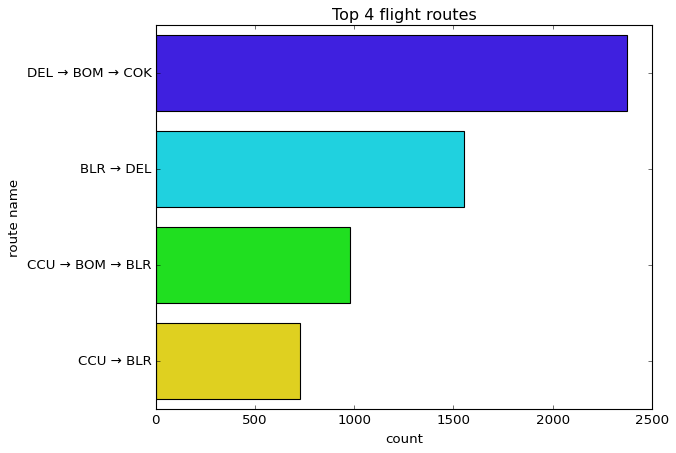

In [ ]:
vc = df['Route'].value_counts().to_frame().reset_index().head(4)
print(vc)
plt.figure(facecolor='White')
sns.barplot(x=vc['Route'],y=vc["index"],palette=("gist_rainbow_r"))
plt.title('Top 4 flight routes')

plt.xlabel('count')
plt.ylabel('route name')

In [ ]:
df['stop5'].fillna('None',inplace=True)
df['stop4'].fillna('None',inplace=True)
df['stop3'].fillna('None',inplace=True)

In [ ]:
df.drop('Route',axis=1,inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min,stop1,stop2,stop3,stop4,stop5
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,18,5,23,30,5,25,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,16,50,21,35,4,45,BLR,NAG,DEL,None,None


labelencoding the ordinal features

In [ ]:
def encoder(features,data):
  from sklearn.preprocessing import LabelEncoder
  lab_enc= LabelEncoder()
  for i in features:                
    data[i]=lab_enc.fit_transform(data[i])
  return data

cat_list = ['stop1','stop2','stop3','stop4','stop5',]
df = encoder(cat_list,df)
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min,stop1,stop2,stop3,stop4,stop5
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,18,5,23,30,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,16,50,21,35,4,45,0,34,8,13,5


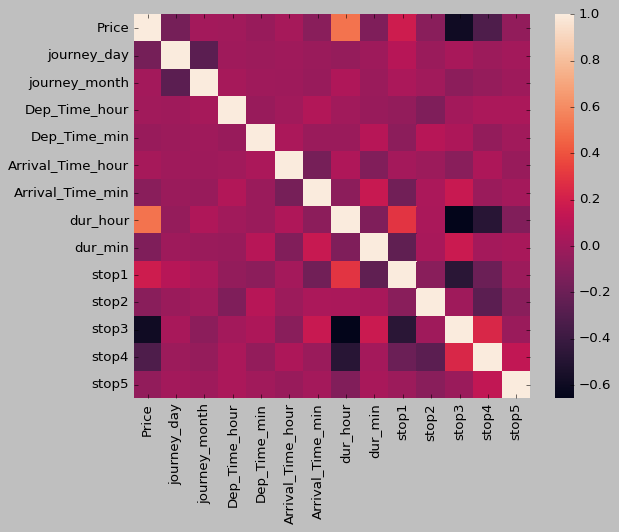

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

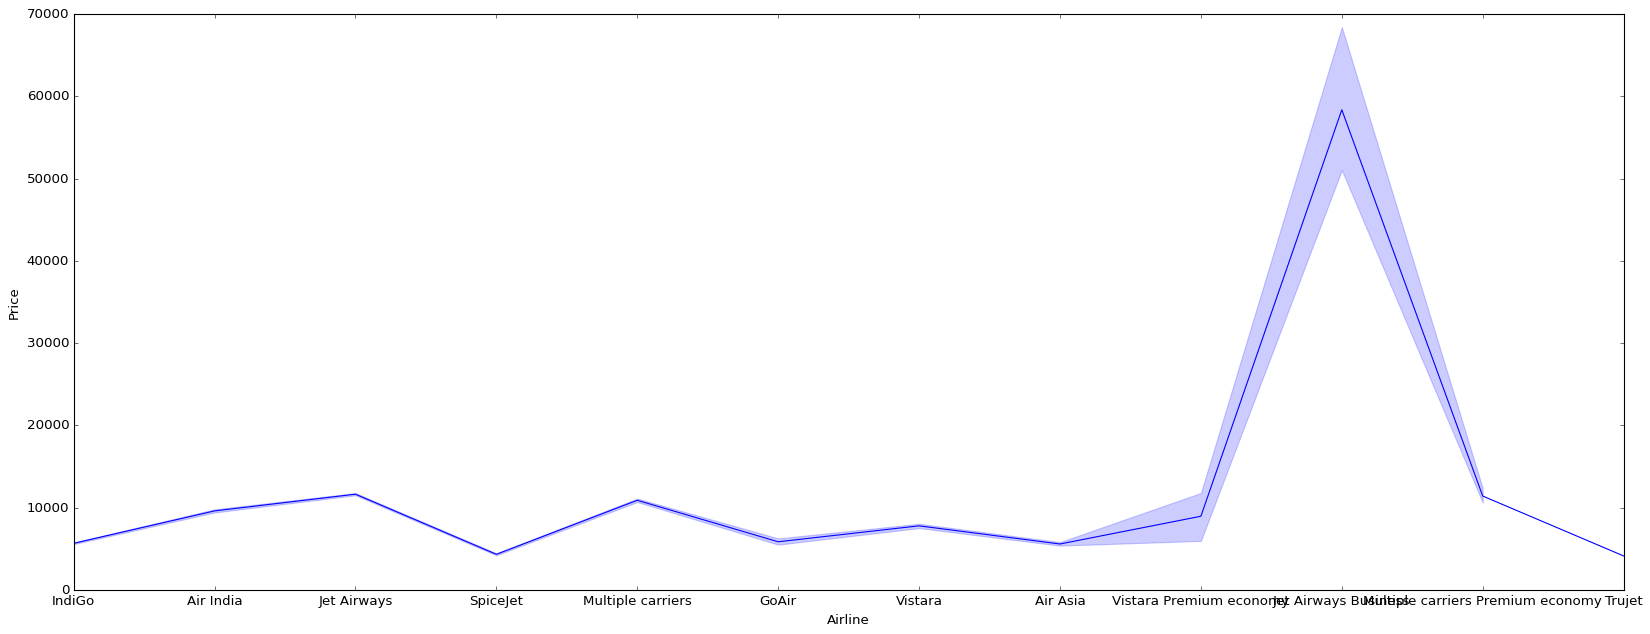

In [ ]:
plt.figure(figsize=(25,9),facecolor='white')
sns.lineplot(x=df['Airline'],y=df['Price'])

this shows that Jet Airways business class is the most expensive
<br>
and rest all having almost similar medians

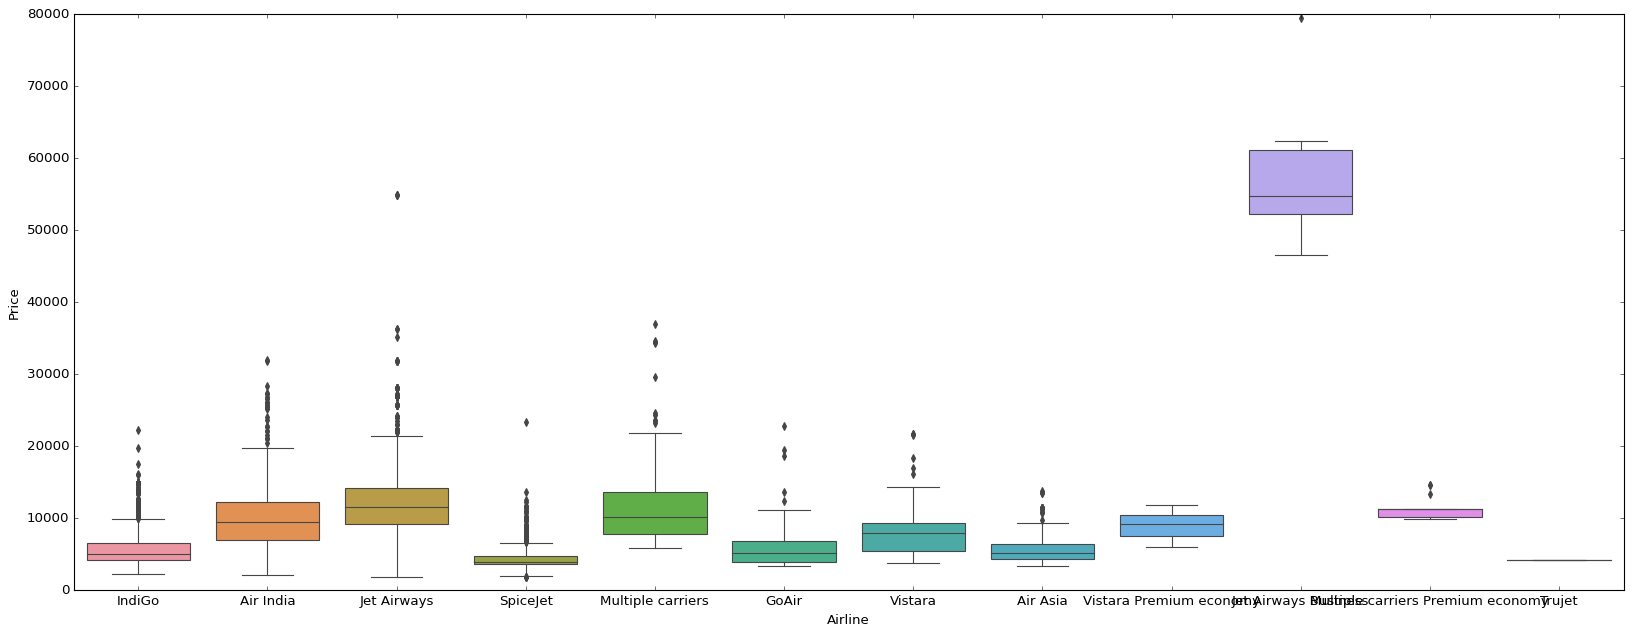

In [ ]:
plt.figure(figsize=(25,9),facecolor='white')
sns.boxplot(x=df['Airline'],y=df['Price'])

Displaying top 5 airlines

               index  Airline
0        Jet Airways     3849
1             IndiGo     2053
2          Air India     1751
3  Multiple carriers     1196
4           SpiceJet      818


Text(0, 0.5, 'airline name')

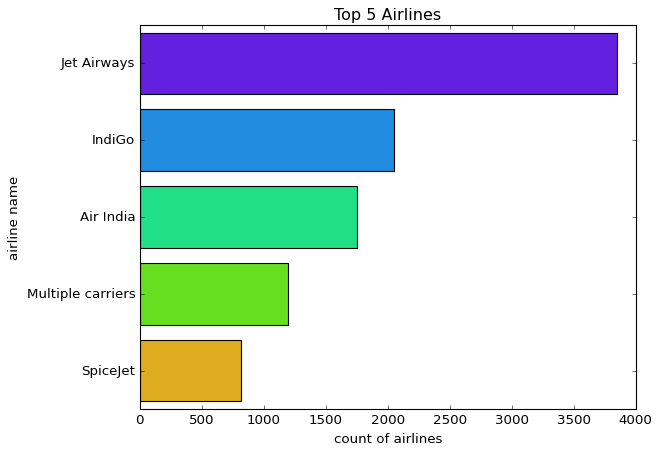

In [ ]:
import plotly.express as px
vc = df['Airline'].value_counts().to_frame().reset_index().head(5)
print(vc)
plt.figure(facecolor='white')
sns.barplot(x=vc['Airline'],y=vc["index"],palette=("gist_rainbow_r"))
plt.title('Top 5 Airlines')
plt.xlabel('count of airlines')
plt.ylabel('airline name')

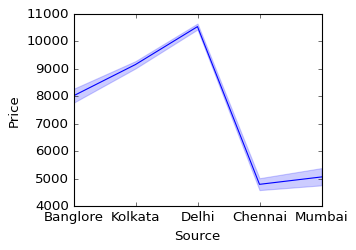

In [ ]:
plt.figure(figsize=(4,3),facecolor='white')
sns.lineplot(x=df['Source'],y=df['Price'])

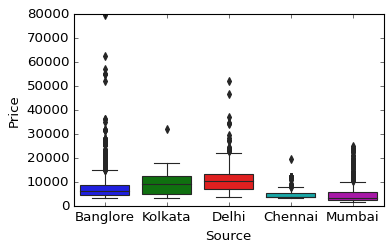

In [ ]:
plt.figure(figsize=(5,3),facecolor='white')
sns.boxplot(x=df['Source'],y=df['Price'])

      index  Source
0     Delhi    4536
1   Kolkata    2871
2  Banglore    2197
3    Mumbai     697


Text(0, 0.5, 'source name')

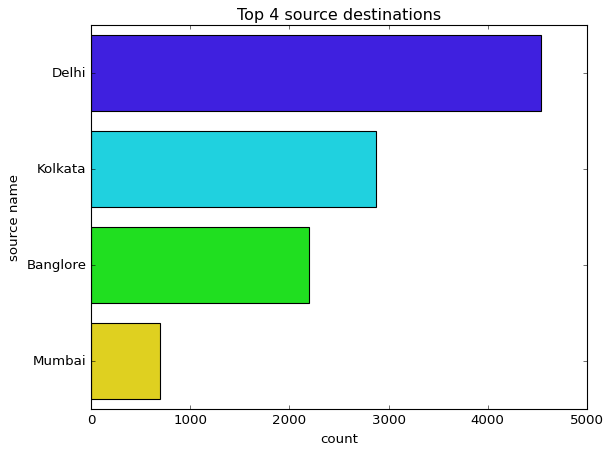

In [ ]:
vc = df['Source'].value_counts().to_frame().reset_index().head(4)
print(vc)
plt.figure(facecolor='white')
sns.barplot(x=vc['Source'],y=vc["index"],palette=("gist_rainbow_r"))
plt.title('Top 4 source destinations')
plt.xlabel('count')
plt.ylabel('source name')

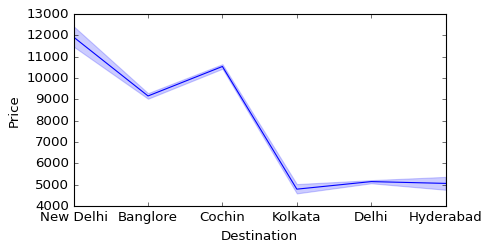

In [ ]:
plt.figure(figsize=(6,3),facecolor='white')
sns.lineplot(x=df['Destination'],y=df['Price'])

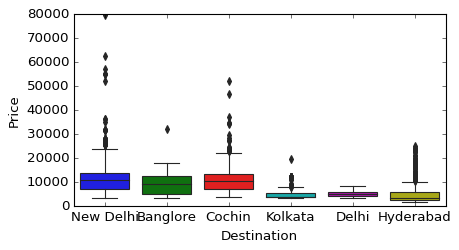

In [ ]:
plt.figure(figsize=(6,3),facecolor='white')
sns.boxplot(x=df['Destination'],y=df['Price'])

       index  Destination
0     Cochin         4536
1   Banglore         2871
2      Delhi         1265
3  New Delhi          932


Text(0, 0.5, 'destination name')

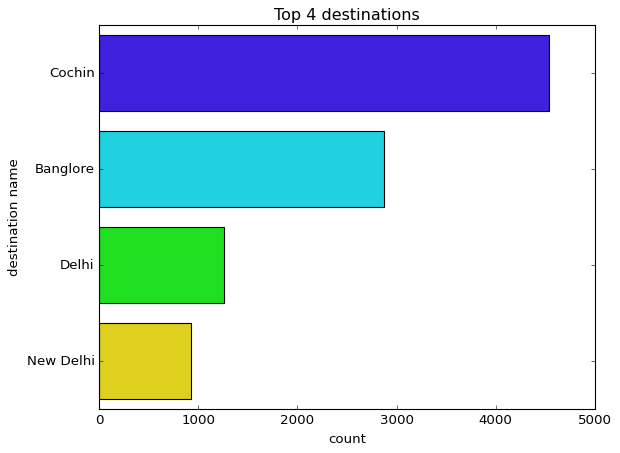

In [ ]:
vc = df['Destination'].value_counts().to_frame().reset_index().head(4)
print(vc)
plt.figure(facecolor='white')
sns.barplot(x=vc['Destination'],y=vc["index"],palette=("gist_rainbow_r"))
plt.title('Top 4 destinations')
plt.xlabel('count')
plt.ylabel('destination name')

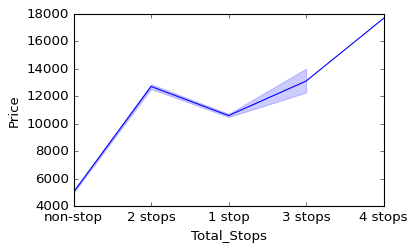

In [ ]:
plt.figure(figsize=(5,3),facecolor='white')
sns.lineplot(x=df['Total_Stops'],y=df['Price'])

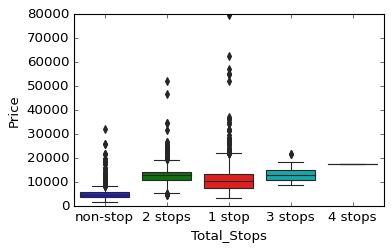

In [ ]:
plt.figure(figsize=(5,3),facecolor='white')
sns.boxplot(x=df['Total_Stops'],y=df['Price'])

      index  Total_Stops
0    1 stop         5625
1  non-stop         3491
2   2 stops         1520


Text(0, 0.5, 'num of stops')

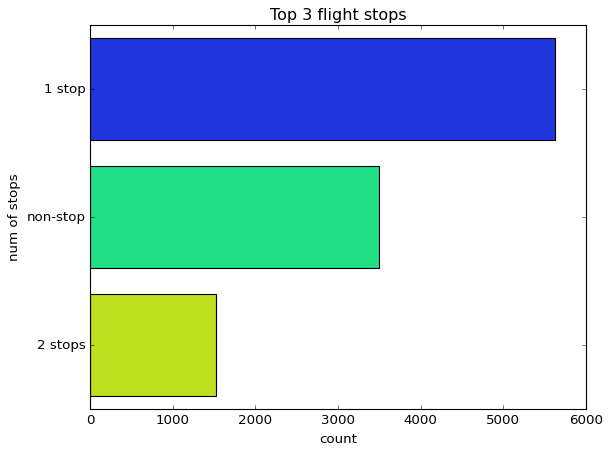

In [ ]:
vc = df['Total_Stops'].value_counts().to_frame().reset_index().head(3)
print(vc)
plt.figure(facecolor='white')
sns.barplot(x=vc['Total_Stops'],y=vc["index"],palette=("gist_rainbow_r"))
plt.title('Top 3 flight stops')
plt.xlabel('count')
plt.ylabel('num of stops')

In [ ]:
c=0
d=0
for i in df['Total_Stops']:
  if i == '4 stops':
    c+=1
  else:
    d+=1
print(c,d)

1 10681


labelEncoding the Total_Stops column

In [ ]:
df = encoder(['Total_Stops'],df)
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min,stop1,stop2,stop3,stop4,stop5
0,IndiGo,Banglore,New Delhi,4,3897,24,3,22,20,1,10,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,1,7662,5,1,5,50,13,15,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,1,13882,6,9,9,25,4,25,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,0,6218,5,12,18,5,23,30,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,0,13302,3,1,16,50,21,35,4,45,0,34,8,13,5


OneHotEncoding the Nominal features, like Airline, Source, Destination

In [ ]:
df = pd.get_dummies(df, columns = ['Airline', 'Source', 'Destination'])

In [ ]:
df.head()

,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,1,7662,5,1,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,1,13882,6,9,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,0,6218,5,12,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,0,13302,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'Dep_Time_hour',
       'Dep_Time_min', 'Arrival_Time_hour', 'Arrival_Time_min', 'dur_hour',
       'dur_min', 'stop1', 'stop2', 'stop3', 'stop4', 'stop5',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

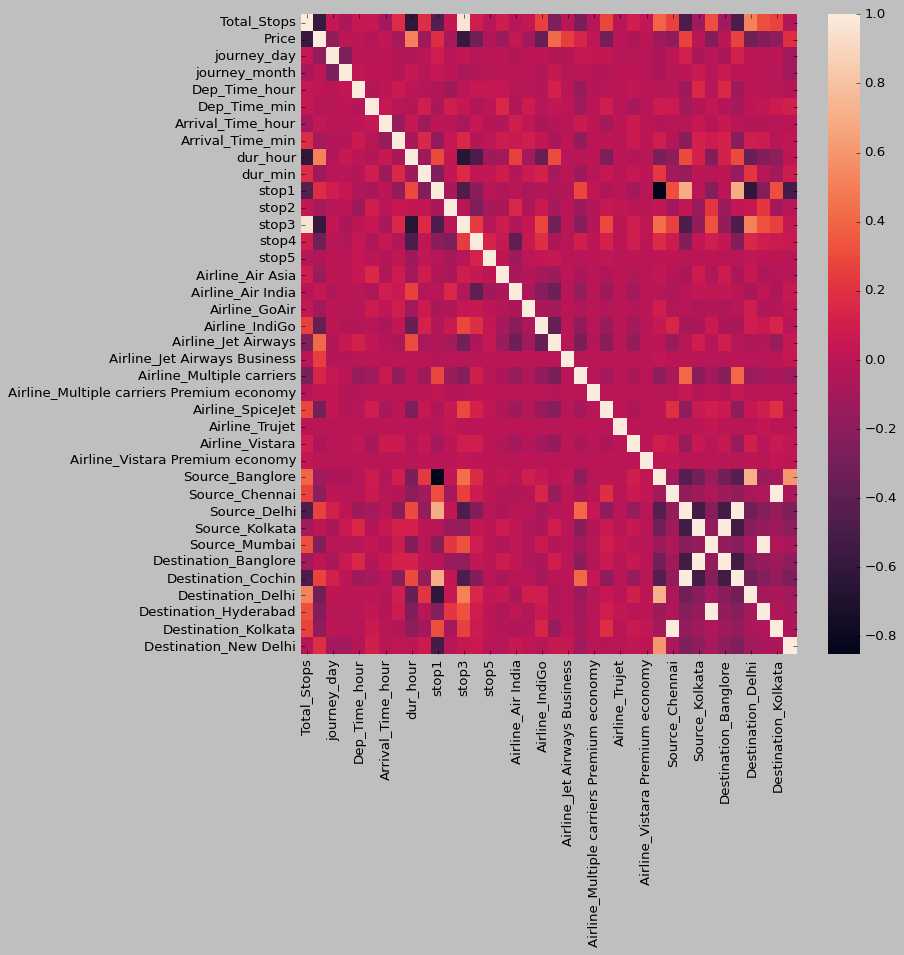

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

Train Test Split

In [ ]:
#for handling outliers we can replace them with the median price
df['Price']=np.where(df['Price']>=40000,df['Price'].median(),df['Price'])

In [ ]:
df.shape

(10682, 38)

In [ ]:
X = df.drop(columns=['Price'])
Y = df['Price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
# from sklearn.ensemble import ExtraTreesRegressor
# selection = ExtraTreesRegressor()
# X = df.drop(columns=['Price'])
# Y = df['Price']
# selection.fit(X, Y)

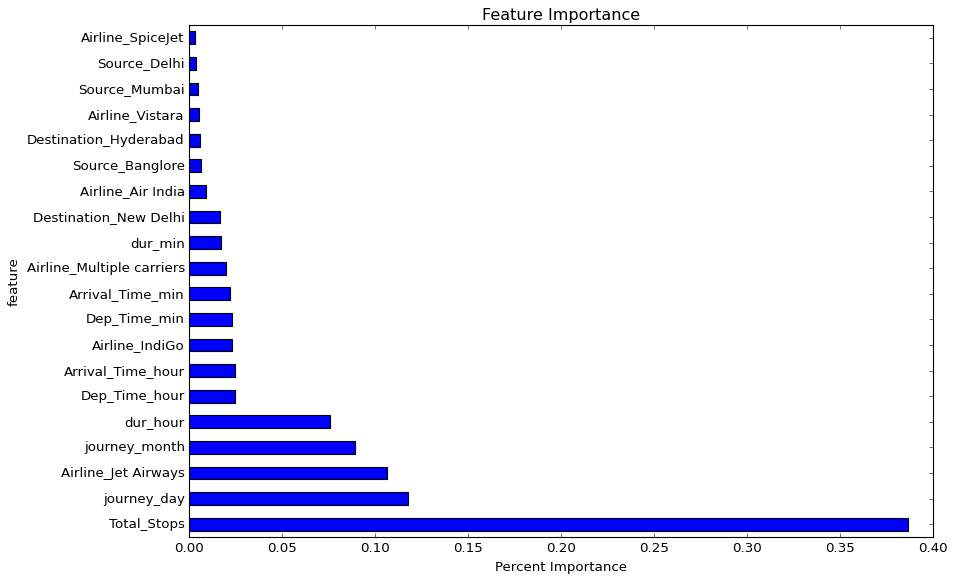

In [ ]:
plt.figure(figsize = (12,8),facecolor='White')
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.xlabel('Percent Importance')
plt.ylabel('feature')
plt.title('Feature Importance')
plt.show()

## Applying Models

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(random_state=42)
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
print(' --------------------------- Model used : RandomForestRegressor ------------------')
print("r2 score : ",r2_score(y_test,y_pred_rfc))  
print('MAE: ',mean_absolute_error(y_test,y_pred_rfc))
print('MSE: ',mean_squared_error(y_test,y_pred_rfc))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred_rfc)))

 --------------------------- Model used : RandomForestRegressor ------------------
r2 score :  0.834606048335468
MAE:  1124.2886596377189
MSE:  3254396.393140352
RMSE:  1803.9945657180767


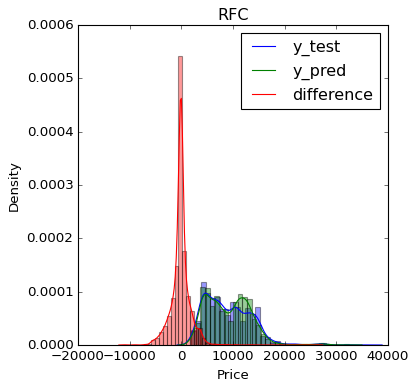

In [ ]:
plt.figure(figsize=(5,5),facecolor='white')
sns.distplot(y_test)
sns.distplot(y_pred_rfc)
sns.distplot(y_test-y_pred_rfc)
plt.title('RFC')
plt.legend(labels=["y_test","y_pred","difference"])
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor()
knnr.fit(x_train,y_train)
y_pred_knnr = knnr.predict(x_test)
print(' -------------------------- Model used : KNeighborsRegressor ------------------')
print("r2 score : ",r2_score(y_test,y_pred_knnr))  
print('MAE: ',mean_absolute_error(y_test,y_pred_knnr))
print('MSE: ',mean_squared_error(y_test,y_pred_knnr))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred_knnr)))

 -------------------------- Model used : KNeighborsRegressor ------------------
r2 score :  0.6347071545399146
MAE:  1767.1695475819033
MSE:  7187733.933079563
RMSE:  2680.9949520802093


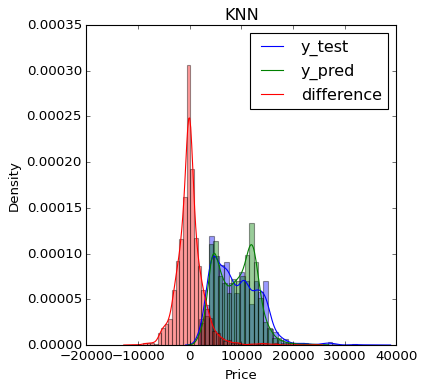

In [ ]:
plt.figure(figsize=(5,5),facecolor='white')
sns.distplot(y_test)
sns.distplot(y_pred_knnr)
sns.distplot(y_test-y_pred_knnr)
plt.title('KNN')
plt.legend(labels=["y_test","y_pred","difference"])
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x_train,y_train)
y_pred_gbr = gbr.predict(x_test)
print(' -------------------------- Model used : GradientBoostingRegressor ------------------')
print("r2 score : ",r2_score(y_test,y_pred_gbr))  
print('MAE: ',mean_absolute_error(y_test,y_pred_gbr))
print('MSE: ',mean_squared_error(y_test,y_pred_gbr))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred_gbr)))

 -------------------------- Model used : GradientBoostingRegressor ------------------
r2 score :  0.7990586655190001
MAE:  1426.4858021194984
MSE:  3953849.2646585098
RMSE:  1988.4288432474796


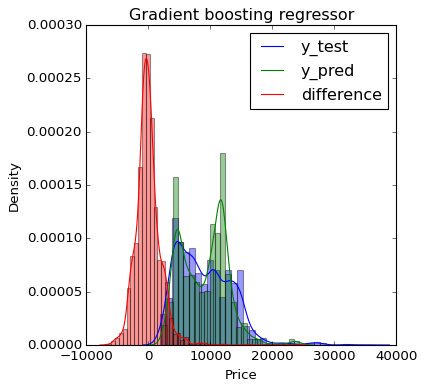

In [ ]:
plt.figure(figsize=(5,5),facecolor='white')
sns.distplot(y_test)
sns.distplot(y_pred_gbr)
sns.distplot(y_test-y_pred_gbr)
plt.title('Gradient boosting regressor')
plt.legend(labels=["y_test","y_pred","difference"])
plt.show()

XGB regressor

In [ ]:
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(x_train,y_train)
y_pred_xgbr = XGBModel.predict(x_test)
print(' -------------------------- Model used : XGBRegressor ------------------')
print("r2 score : ",r2_score(y_test,y_pred_xgbr))  
print('MAE: ',mean_absolute_error(y_test,y_pred_xgbr))
print('MSE: ',mean_squared_error(y_test,y_pred_xgbr))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred_xgbr)))

[10:12:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 -------------------------- Model used : XGBRegressor ------------------
r2 score :  0.7984635299590498
MAE:  1430.3123404897133
MSE:  3965559.5297573223
RMSE:  1991.3712686883182


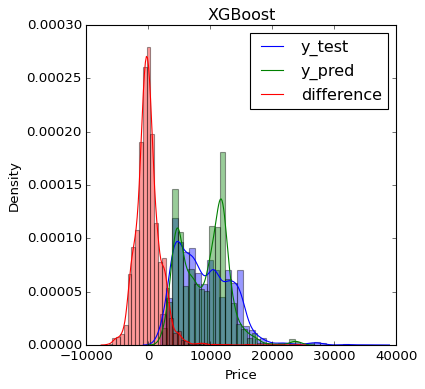

In [ ]:
plt.figure(figsize=(5,5),facecolor='white')
sns.distplot(y_test)
sns.distplot(y_pred_xgbr)
sns.distplot(y_test-y_pred_xgbr)
plt.title('XGBoost')
plt.legend(labels=["y_test","y_pred","difference"])
plt.show()

LightGBM

In [ ]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(x_train,y_train)
y_pred_lgbm = lgbm.predict(x_test)
print(' -------------------------- Model used : Light GBM Regressor ------------------')
print("r2 score : ",r2_score(y_test,y_pred_lgbm))  
print('MAE: ',mean_absolute_error(y_test,y_pred_lgbm))
print('MSE: ',mean_squared_error(y_test,y_pred_lgbm))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred_lgbm)))

 -------------------------- Model used : Light GBM Regressor ------------------
r2 score :  0.8564139460215026
MAE:  1166.758211957786
MSE:  2825290.3535473435
RMSE:  1680.8600041488712


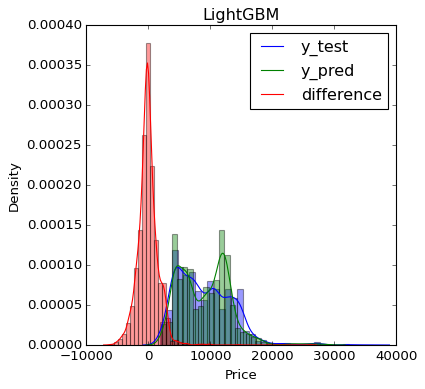

In [ ]:
plt.figure(figsize=(5,5),facecolor='white')
sns.distplot(y_test)
sns.distplot(y_pred_lgbm)
sns.distplot(y_test-y_pred_lgbm)
plt.title('LightGBM')
plt.legend(labels=["y_test","y_pred","difference"])
plt.show()

SVM

In [ ]:
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score
clf = SVC(kernel='linear') 
# fitting x samples and y classes 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test) 

In [ ]:
print(' -------------------------- Model used : SVM(linear kernel) ------------------')
print("r2 score : ",r2_score(y_test,y_pred))  
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))

 -------------------------- Model used : SVM(linear kernel) ------------------
r2 score :  0.596588283519693
MAE:  1544.041185647426
MSE:  7937785.03900156
RMSE:  2817.40750318472


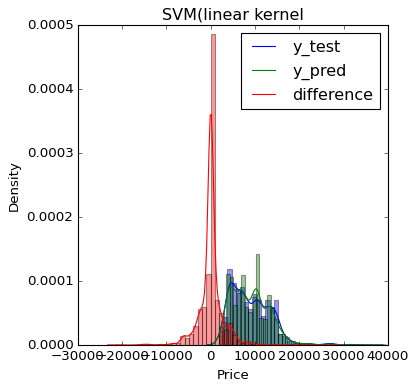

In [ ]:
plt.figure(figsize=(5,5),facecolor='white')
sns.distplot(y_test)
sns.distplot(y_pred)
sns.distplot(y_test-y_pred)
plt.title('SVM(linear kernel')
plt.legend(labels=["y_test","y_pred","difference"])
plt.show()

SVM with RBF kernel

In [ ]:
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score
clf = SVC(kernel='rbf') 
# fitting x samples and y classes 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test) 

In [ ]:
print(' -------------------------- Model used : SVM(RBF kernel) ------------------')
print("r2 score : ",r2_score(y_test,y_pred))  
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))

 -------------------------- Model used : SVM(RBF kernel) ------------------
r2 score :  0.34976174674031213
MAE:  2385.6708268330735
MSE:  12794500.67425897
RMSE:  3576.9401272958107


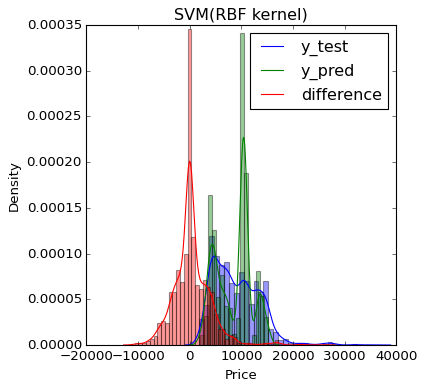

In [ ]:
plt.figure(figsize=(5,5),facecolor='white')
sns.distplot(y_test)
sns.distplot(y_pred)
sns.distplot(y_test-y_pred)
plt.title('SVM(RBF kernel)')
plt.legend(labels=["y_test","y_pred","difference"])
plt.show()

MLP

In [ ]:
#Change to numpy arraay. 
x_train=x_train.values
y_train=y_train.values
x_test=x_test.values
y_test=y_test.values 

In [ ]:
# import torch #python #keras #tensorflow #pytorch
# import torch.nn as nn
# from torch.autograd import Variable

# import pandas as pd

# from sklearn.utils import shuffle
# from torchsummary import summary

In [ ]:
# def get_accuracy(logit, target, batch_size):
#     ''' Obtain accuracy for training round '''
#     corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
#     accuracy = 100.0 * corrects/batch_size
#     return accuracy.item()

In [ ]:
# #Define training hyperprameters.
# batch_size = 1 #sample batch
# num_epochs = 100 #number times dataset seen
# learning_rate = 0.1
# size_hidden_1 = 128 #neurons
# size_hidden_2 = 64 #neurons
# num_classes = 1

# #Calculate some other hyperparameters based on data.  
# batch_no = len(x_train) // batch_size  #batches
# cols = x_train.shape[1] #Number of columns in input matrix

In [ ]:
# #Create the model
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# class Net(torch.nn.Module):
#     def __init__(self, num_inputs, size_hidden_1=128,size_hidden_2=64, n_output=1):
#         super(Net, self).__init__()
#         self.hidden_layer_1 = torch.nn.Linear(num_inputs, size_hidden_1)   # hidden layer
#         self.activation_1 = torch.nn.Tanh() # activation layer
#         self.hidden_layer_2 = torch.nn.Linear(size_hidden_1, size_hidden_2)   # hidden layer
#         self.activation_2 = torch.nn.Tanh() # activation layer
        
#         self.output_layer = torch.nn.Linear(size_hidden_2, n_output)   # output layer
#         self.output_act = torch.nn.Sigmoid()

#     def forward(self, x):
#         y = self.activation_1(self.hidden_layer_1(x))      # activation function for hidden layer
#         z = self.activation_2(self.hidden_layer_2(y))      # activation function for hidden layer
#         w = self.output_act(self.output_layer(z))                    # output
#         return w

# net = Net(cols, size_hidden_1, size_hidden_2,num_classes)
# #summary(Net, (1, 4))

In [ ]:
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# loss_func = torch.nn.MSELoss()

In [ ]:
# loss_list = []
# acc_list = []
# for epoch in range(num_epochs):
#     #Shuffle just mixes up the dataset between epocs
#     x, y= shuffle(x_train, y_train)

#     train_acc = 0.0
#     running_loss = 0.0
#     # Mini batch learning
#     for i in range(batch_no):
#         start = i * batch_size
#         end = start + batch_size
#         inputs = Variable(torch.FloatTensor(x[start:end]))
#         labels = Variable(torch.FloatTensor(y[start:end]))
#         # print(labels)
#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = net(inputs)
#         # print(outputs)
#         #print("outputs",outputs,outputs.shape,"labels",labels, labels.shape)
#         #loss = criterion(outputs, torch.unsqueeze(labels, dim=1))
#         loss = loss_func(outputs, labels)
        
#         loss.backward()
#         optimizer.step()

#         # print statistics
#         running_loss += loss.item()
#         acc = get_accuracy(outputs, labels, batch_size)
#         train_acc += acc
      
#     print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
#           %(epoch+1, running_loss / (i+1), train_acc/(i+1)))  
#     loss_list.append(running_loss / (i+1))
#     acc_list.append(train_acc/(i+1))
#     running_loss = 0.0

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               4864      
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 1)                 257       
                                                                 
Total params: 169,729
Trainable params: 169,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# from keras.callbacks import ModelCheckpoint
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Flatten
# NN_model = Sequential()

# # The Input Layer :
# NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='tanh'))

# # The Hidden Layers :
# NN_model.add(Dense(256, kernel_initializer='normal',activation='tanh'))
# NN_model.add(Dense(256, kernel_initializer='normal',activation='tanh'))
# NN_model.add(Dense(256, kernel_initializer='normal',activation='tanh'))

# # The Output Layer :
# NN_model.add(Dense(1, kernel_initializer='normal',activation='softmax'))

# # Compile the network :
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
# NN_model.summary()

In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Epoch 1/500
186/187 [============================>.] - ETA: 0s - loss: 3898.5000 - mean_absolute_error: 3898.5000
Epoch 1: val_loss improved from inf to 2506.46899, saving model to Weights-001--2506.46899.hdf5
187/187 [==============================] - 2s 8ms/step - loss: 3890.7227 - mean_absolute_error: 3890.7227 - val_loss: 2506.4690 - val_mean_absolute_error: 2506.4690
Epoch 2/500
179/187 [===========================>..] - ETA: 0s - loss: 2466.6089 - mean_absolute_error: 2466.6089
Epoch 2: val_loss improved from 2506.46899 to 2339.45947, saving model to Weights-002--2339.45947.hdf5
187/187 [==============================] - 1s 7ms/step - loss: 2463.7881 - mean_absolute_error: 2463.7881 - val_loss: 2339.4595 - val_mean_absolute_error: 2339.4595
Epoch 3/500
184/187 [============================>.] - ETA: 0s - loss: 2263.5874 - mean_absolute_error: 2263.5874
Epoch 3: val_loss improved from 2339.45947 to 2149.32153, saving model to Weights-003--2149.32153.hdf5
187/187 [=================

In [ ]:
wights_file = 'Weights-190--1310.87488.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
y_pred = NN_model.predict(x_test)

In [ ]:
NN_model.save("flightPrediction.h5")

In [ ]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format keras '/content/flightPrediction.h5' '/content/flightPrediction'

     |████████████████████████████████| 77 kB 5.4 MB/s 
     |████████████████████████████████| 462 kB 51.5 MB/s 


In [ ]:
print(' -------------------------- Model used : Deep neural nets ------------------')
print("r2 score : ",r2_score(y_test,y_pred))  
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))

 -------------------------- Model used : Deep neural nets ------------------
r2 score :  0.8051471869705548
MAE:  1291.4162429690548
MSE:  3834047.651285811
RMSE:  1958.072432594313


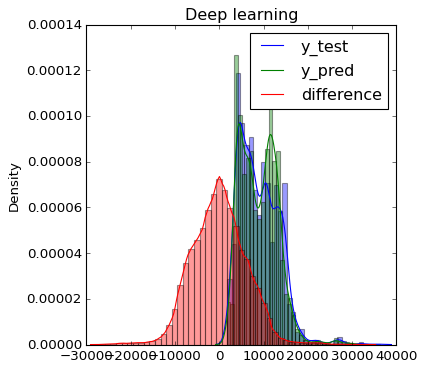

In [ ]:
plt.figure(figsize=(5,5),facecolor='White')
sns.distplot(y_test)
sns.distplot(y_pred)
sns.distplot(y_test-y_pred)
plt.title('Deep learning')
plt.legend(labels=["y_test","y_pred","difference"])
plt.show()

## Feature selection

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
sffs = SFS(rfc, k_features=18,verbose=2,cv=4,forward=True,floating=True, scoring='r2')
sffs = sffs.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   25.8s finished

[2022-04-19 19:26:38] Features: 1/18 -- score: 0.5140569630665642[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   27.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished

[2022-04-19 19:27:06] Features: 2/18 -- score: 0.6286994142103031[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jo

In [ ]:
sffs.subsets_

{1: {'avg_score': 0.5140569630665642,
  'cv_scores': array([0.50066527, 0.5233434 , 0.53555252, 0.49666666]),
  'feature_idx': (10,),
  'feature_names': ('10',)},
 2: {'avg_score': 0.6286994142103031,
  'cv_scores': array([0.62030835, 0.63133783, 0.64442777, 0.61872371]),
  'feature_idx': (1, 10),
  'feature_names': ('1', '10')},
 3: {'avg_score': 0.6847338266971383,
  'cv_scores': array([0.69612337, 0.67174511, 0.68953492, 0.68153191]),
  'feature_idx': (1, 2, 10),
  'feature_names': ('1', '2', '10')},
 4: {'avg_score': 0.7340223648612978,
  'cv_scores': array([0.75333418, 0.73027519, 0.72274745, 0.72973264]),
  'feature_idx': (1, 2, 10, 18),
  'feature_names': ('1', '2', '10', '18')},
 5: {'avg_score': 0.7879542166796775,
  'cv_scores': array([0.7941056 , 0.78691543, 0.78295085, 0.78784499]),
  'feature_idx': (1, 2, 10, 11, 18),
  'feature_names': ('1', '2', '10', '11', '18')},
 6: {'avg_score': 0.8040134890579734,
  'cv_scores': array([0.81227021, 0.8032097 , 0.80303531, 0.79753874]

In [ ]:
print(sffs.k_feature_idx_)
print('CV Score:')
print(sffs.k_score_)

(1, 2, 9, 10, 11, 12, 14, 15, 18, 19, 20, 21, 22, 24, 26, 29, 33, 34)
CV Score:
0.8205549417098117


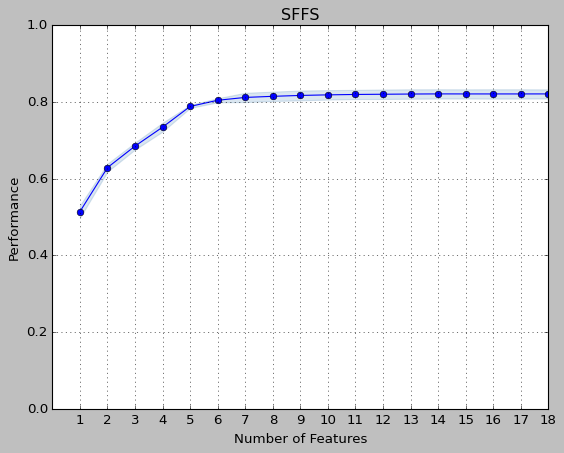

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sffs
fig1 = plot_sffs(sffs.get_metric_dict(), kind='std_dev')
plt.ylim([0, 1])
plt.title('SFFS')
plt.grid()
plt.show()

In [ ]:
sffs_df = pd.DataFrame()
for i in [1, 2, 9, 10, 11, 12, 14, 15, 18, 19, 20, 21, 22, 24, 26, 29, 33, 34]:
  sffs_df = pd.concat([sffs_df,df[df.columns[i]]],axis=1)

In [ ]:
sffs_df

,Price,journey_day,dur_min,stop1,stop2,stop3,stop5,Airline_Air Asia,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_Trujet,Airline_Vistara Premium economy,Source_Delhi,Destination_Cochin,Destination_Delhi
0,3897.0,24,50,0,13,29,5,0,1,0,0,0,0,0,0,0,0,0
1,7662.0,5,25,2,25,1,5,0,0,0,0,0,0,0,0,0,0,0
2,13882.0,6,0,3,32,4,5,0,0,1,0,0,0,0,0,1,1,0
3,6218.0,5,25,2,34,3,5,0,1,0,0,0,0,0,0,0,0,0
4,13302.0,3,45,0,34,8,5,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,4107.0,4,30,2,5,29,5,1,0,0,0,0,0,0,0,0,0,0
10678,4145.0,27,35,2,5,29,5,0,0,0,0,0,0,0,0,0,0,0
10679,7229.0,27,0,0,13,29,5,0,0,1,0,0,0,0,0,0,0,1
10680,12648.0,3,40,0,13,29,5,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
sffs_df_x = sffs_df.drop(columns=['Price'])
sffs_df_y = sffs_df['Price'] 
x_train_sffs,x_test_sffs,y_train_sffs,y_test_sffs = train_test_split(sffs_df_x,sffs_df_y,test_size=0.3,random_state=42) 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(random_state=42)
rfc.fit(x_train_sffs,y_train_sffs)
y_pred_rfc_sffs = rfc.predict(x_test_sffs)
print(' --------------------------- Model used : RandomForestRegressor ------------------')
print("r2 score : ",r2_score(y_test_sffs,y_pred_rfc_sffs))  
print('MAE: ',mean_absolute_error(y_test,y_pred_rfc_sffs))
print('MSE: ',mean_squared_error(y_test,y_pred_rfc_sffs))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred_rfc_sffs)))

 --------------------------- Model used : RandomForestRegressor ------------------
r2 score :  0.7220001430494375
MAE:  1472.8140044082008
MSE:  5470101.673297512
RMSE:  2338.8248487857127


let's find best number of features

In [ ]:
from tqdm import tqdm 
feats = [5,10,15,25]
cv_score = []
for i in tqdm(feats):
  sffs = SFS(rfc, k_features=i,verbose=2,cv=4,forward=True,floating=True, scoring='r2')
  sffs = sffs.fit(x_train.values, y_train)
  cv_score.append(sffs.k_score_)
  print(" --------------------------------- X ----------------------------------")
  print()

  0%|          | 0/2 [00:00<?, ?it/s][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   52.3s finished

[2022-04-20 09:00:47] Features: 1/23 -- score: 0.5140569630665642[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   31.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished

[2022-04-20 09:01:19] Features: 2/23 -- score: 0.6286994142103031[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1

 --------------------------------- X ----------------------------------



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   22.9s finished

[2022-04-20 09:39:12] Features: 1/28 -- score: 0.5140569630665642[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   30.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished

[2022-04-20 09:39:43] Features: 2/28 -- score: 0.6286994142103031[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   47.9s finished
[Parallel(n_jobs=1)]: Usi

 --------------------------------- X ----------------------------------



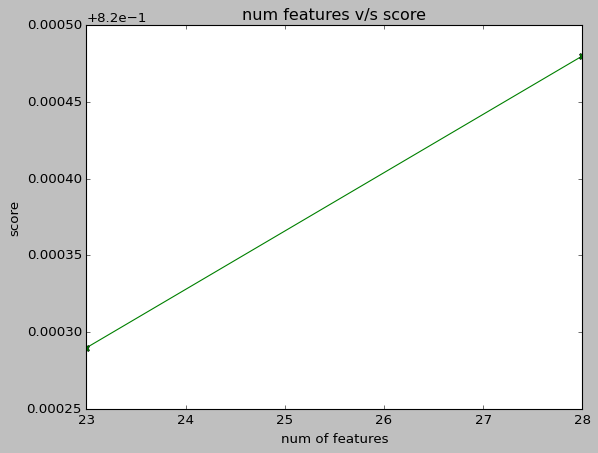

In [ ]:
plt.xlabel('num of features')
plt.ylabel('score')
plt.title('num features v/s score')
plt.plot(feats,cv_score, color='green',marker='X')

## Parameter optimization

In [ ]:
!pip install flaml

     |████████████████████████████████| 157 kB 24.5 MB/s 
     |████████████████████████████████| 2.0 MB 41.6 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [ ]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(x_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 180}

In [ ]:
rf_random.best_params_

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 180}

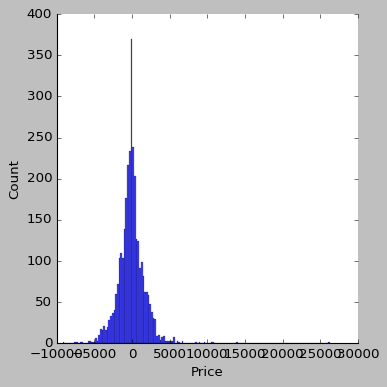

In [ ]:
prediction = rf_random.predict(x_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [ ]:
r2_score(y_test,prediction)

0.8477616067855088

### AutoML

In [ ]:
from flaml import AutoML
automl = AutoML()

In [ ]:
settings = {
    "time_budget": 1500,  # total running time in seconds
    "metric": 'r2',  # can be: 'r2', 'rmse', 'mae', 'mse', 'accuracy', 'roc_auc', 'roc_auc_ovr',
                           # 'roc_auc_ovo', 'log_loss', 'mape', 'f1', 'ap', 'ndcg', 'micro_f1', 'macro_f1'
    "task": 'regression',  # task type
    "log_file_name": 'bonus_project1.log',  # flaml log file
    "seed": 7654321,    # random seed
}

In [ ]:
'''The main flaml automl API'''
automl.fit(X_train=x_train, y_train=y_train, **settings)

[flaml.automl: 04-20 07:22:56] {2105} INFO - task = regression
[flaml.automl: 04-20 07:22:56] {2107} INFO - Data split method: uniform
[flaml.automl: 04-20 07:22:56] {2111} INFO - Evaluation method: cv
[flaml.automl: 04-20 07:22:56] {2188} INFO - Minimizing error metric: 1-r2
[flaml.automl: 04-20 07:22:56] {2281} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 04-20 07:22:56] {2567} INFO - iteration 0, current learner lgbm
[flaml.automl: 04-20 07:22:57] {2698} INFO - Estimated sufficient time budget=3066s. Estimated necessary time budget=22s.
[flaml.automl: 04-20 07:22:57] {2750} INFO -  at 0.6s,	estimator lgbm's best error=0.6756,	best estimator lgbm's best error=0.6756
[flaml.automl: 04-20 07:22:57] {2567} INFO - iteration 1, current learner lgbm
[flaml.automl: 04-20 07:22:57] {2750} INFO -  at 0.9s,	estimator lgbm's best error=0.6756,	best estimator lgbm's best error=0.6756
[flaml.automl: 04-20 07:22:57] {2567} INFO 

In [ ]:
'''retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 482, 'max_leaves': 15, 'min_child_weight': 0.0016004767395815047, 'learning_rate': 0.07431663237209522, 'subsample': 0.9580366287051754, 'colsample_bylevel': 0.8888171259224309, 'colsample_bytree': 0.5002146150588475, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.8890654912388815}
Best accuracy on validation data: 0.8534
Training duration of best run: 1.567 s


In [ ]:
import xgboost as xg
xgbr = xg.XGBRegressor(n_estimators=482, max_leaves=15, min_child_weight= 0.0016004767395815047, learning_rate= 0.07431663237209522, subsample= 0.9580366287051754, colsample_bylevel=0.8888171259224309, colsample_bytree=0.5002146150588475, reg_alpha=0.0009765625, reg_lambda=0.8890654912388815)
xgbr.fit(x_train,y_train)
y_pred_xgbr = xgbr.predict(x_test)
print(' --------------------------- Model used : XGBRegressor ------------------')
print("r2 score : ",r2_score(y_test,y_pred_xgbr))  
print('MAE: ',mean_absolute_error(y_test,y_pred_xgbr))
print('MSE: ',mean_squared_error(y_test,y_pred_xgbr))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred_xgbr)))

[08:56:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 --------------------------- Model used : XGBRegressor ------------------
r2 score :  0.8334158903337324
MAE:  1282.21236079033
MSE:  3277814.6975531485
RMSE:  1810.4736113937558


In [ ]:
rf = RandomForestRegressor(max_depth= 15, max_features= 'auto', n_estimators= 180)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print(' --------------------------- Model used : regressor ------------------')
print("r2 score : ",r2_score(y_test,y_pred_rf))  
print('MAE: ',mean_absolute_error(y_test,y_pred_rf))
print('MSE: ',mean_squared_error(y_test,y_pred_rf))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

 --------------------------- Model used : regressor ------------------
r2 score :  0.8501613551495472
MAE:  1097.707391595467
MSE:  2948320.3009951585
RMSE:  1717.0673548219238


## Applying Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
estimators = [50, 100, 200,300,500] 
max_depths = [3, 6, 8,10, 15, 20] 

grid_values = {'n_estimators': estimators, 'max_depth':max_depths}

clf = GridSearchCV(RandomForestRegressor(random_state=42), grid_values, scoring='r2', n_jobs=-1, verbose=1, cv=5)
clf.fit(x_train, y_train)
best_n_estimators_value = clf.best_params_['n_estimators']
best_max_depth_value = clf.best_params_['max_depth']
best_score = clf.best_score_
print(best_max_depth_value)
print(best_n_estimators_value)
print(best_score)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
10
500
0.8233454177776685


In [ ]:
print(best_max_depth_value)
print(best_n_estimators_value)
print(best_score)

10
500
0.8233454177776685


In [ ]:
rf = RandomForestRegressor(random_state=42,max_depth=best_max_depth_value , max_features= 'auto', n_estimators=best_n_estimators_value)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print(' --------------------------- Model used : regressor ------------------')
print("r2 score : ",r2_score(y_test,y_pred_rf))  
print('MAE: ',mean_absolute_error(y_test,y_pred_rf))
print('MSE: ',mean_squared_error(y_test,y_pred_rf))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

 --------------------------- Model used : regressor ------------------
r2 score :  0.8480576870157601
MAE:  1179.5556368775553
MSE:  2989713.4107072176
RMSE:  1729.0787751595408


In [ ]:
from sklearn.model_selection import GridSearchCV
estimators = [50, 100, 200,300,500] 
max_depths = [3, 6, 8, 10, 15, 20] 

grid_values = {'n_estimators': estimators, 'max_depth':max_depths}

clf = GridSearchCV(GradientBoostingRegressor(random_state=42), grid_values, scoring='r2', n_jobs=-1, verbose=1, cv=5)
clf.fit(x_train, y_train)
best_n_estimators_value = clf.best_params_['n_estimators']
best_max_depth_value = clf.best_params_['max_depth']
best_score = clf.best_score_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
print(best_max_depth_value)
print(best_n_estimators_value)
print(best_score)

6
200
0.8390128726420137


In [ ]:
gbr = GradientBoostingRegressor(random_state=42,max_depth=best_max_depth_value,n_estimators=best_n_estimators_value)
gbr.fit(x_train,y_train)
y_pred_gbr = gbr.predict(x_test)
print(' -------------------------- Model used : GradientBoostingRegressor ------------------')
print("r2 score : ",r2_score(y_test,y_pred_gbr))  
print('MAE: ',mean_absolute_error(y_test,y_pred_gbr))
print('MSE: ',mean_squared_error(y_test,y_pred_gbr))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred_gbr)))

 -------------------------- Model used : GradientBoostingRegressor ------------------
r2 score :  0.8609162742066868
MAE:  1083.2448055798693
MSE:  2736699.6858769967
RMSE:  1654.297339016477


In [ ]:
from sklearn.model_selection import GridSearchCV
estimators = [50, 100, 200,300,500] 
max_depths = [3, 6, 8, 10, 15, 20] 

grid_values = {'n_estimators': estimators, 'max_depth':max_depths}

clf = GridSearchCV(XGBRegressor(random_state=42), grid_values, scoring='r2', n_jobs=-1, verbose=1, cv=5)
clf.fit(x_train, y_train)
best_n_estimators_value = clf.best_params_['n_estimators']
best_max_depth_value = clf.best_params_['max_depth']
best_score = clf.best_score_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[11:47:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print(best_max_depth_value)
print(best_n_estimators_value)
print(best_score)

6
200
0.8469661866514198


In [ ]:
XGBModel = XGBRegressor(random_state=42,max_depth=best_max_depth_value,n_estimators=best_n_estimators_value)
XGBModel.fit(x_train,y_train)
y_pred_xgbr = XGBModel.predict(x_test)
print(' -------------------------- Model used : XGBRegressor ------------------')
print("r2 score : ",r2_score(y_test,y_pred_xgbr))  
print('MAE: ',mean_absolute_error(y_test,y_pred_xgbr))
print('MSE: ',mean_squared_error(y_test,y_pred_xgbr))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred_xgbr)))

[11:47:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 -------------------------- Model used : XGBRegressor ------------------
r2 score :  0.8661053856061672
MAE:  1080.2076109030688
MSE:  2634595.4356785063
RMSE:  1623.1436891657208


In [ ]:
from sklearn.model_selection import GridSearchCV
estimators = [50, 100, 200,300,400,500] 
max_depths = [3, 6, 8, 10, 16, 20] 

grid_values = {'n_estimators': estimators, 'max_depth':max_depths}

clf = GridSearchCV(LGBMRegressor(random_state=42), grid_values, scoring='r2', n_jobs=-1, verbose=1, cv=5)
clf.fit(x_train, y_train)
best_n_estimators_value = clf.best_params_['n_estimators']
best_max_depth_value = clf.best_params_['max_depth']
best_score = clf.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [ ]:
print(best_max_depth_value)
print(best_n_estimators_value)
print(best_score)

8
300
0.8421017651836571


In [ ]:
from lightgbm import LGBMRegressor
# lgbm = LGBMRegressor(random_state=42,max_depth=best_max_depth_value,n_estimators=best_n_estimators_value)
lgbm = LGBMRegressor(random_state=42,max_depth=8,n_estimators=300)
lgbm.fit(x_train,y_train)
y_pred_lgbm = lgbm.predict(x_test)
print(' -------------------------- Model used : Light GBM Regressor ------------------')
print("r2 score : ",r2_score(y_test,y_pred_lgbm))  
print('MAE: ',mean_absolute_error(y_test,y_pred_lgbm))
print('MSE: ',mean_squared_error(y_test,y_pred_lgbm))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred_lgbm)))

 -------------------------- Model used : Light GBM Regressor ------------------
r2 score :  0.8670394603984329
MAE:  1081.1110692239774
MSE:  2616215.9870694154
RMSE:  1617.4720977715242


In [ ]:
import bz2
import pickle
import _pickle as cpickle

In [ ]:
sfile = bz2.BZ2File('flight_lgbm.pkl','wb')
pickle.dump(lgbm,sfile)


In [ ]:
f=bz2.BZ2File('flight_lgbm.pkl','rb')
myobj=cpickle.load(f)

In [ ]:
df.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'Dep_Time_hour',
       'Dep_Time_min', 'Arrival_Time_hour', 'Arrival_Time_min', 'dur_hour',
       'dur_min', 'stop1', 'stop2', 'stop3', 'stop4', 'stop5',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [ ]:
print(df.head().to_string())

   Total_Stops    Price  journey_day  journey_month  Dep_Time_hour  Dep_Time_min  Arrival_Time_hour  Arrival_Time_min  dur_hour  dur_min  stop1  stop2  stop3  stop4  stop5  Airline_Air Asia  Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  Airline_Jet Airways Business  Airline_Multiple carriers  Airline_Multiple carriers Premium economy  Airline_SpiceJet  Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  Source_Banglore  Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  Destination_Banglore  Destination_Cochin  Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi
0            4   3897.0           24              3             22            20                  1                10         2       50      0     13     29     13      5                 0                  0              0               1                    0                             0                          0                                